In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from data_prep import read_train_data, read_test_data, create_Xy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [10]:
columns = ["TotalDays_award", "TotalDays_usage", "PI_New", "PI_PrevUsage", "PI_PrevUsageRate",
           'FoS_AdvSciComp',
           'FoS_AstronmSci', 'FoS_AtmosphSci', 'FoS_BioChemMol', 'FoS_BiologySci',
           'FoS_BioPhysics', 'FoS_ChemReactP', 'FoS_ChemThermS', 'FoS_Chemistry',
           'FoS_CompMath', 'FoS_CompCompR', 'FoS_CondMatPhy', 'FoS_EarthSci',
           'FoS_Engineer', 'FoS_ExtAstrCos', 'FoS_FluidPartH', 'FoS_GeneNuclAc',
           'FoS_MaterialRe', 'FoS_MechanMate', 'FoS_MoleculBio', 'FoS_PhysChem',
           'FoS_Physics', 'FoS_StellAstro', 'FoS_OtherBio', 'FoS_OtherComp',
           'FoS_OtherEngi', 'FoS_OtherGeos', 'FoS_OtherMathPhys', 'FoS_SociBehEco',
           'FoS_HumanArts', 'Type_Startup',
           'Type_Research', 'Type_Discretionary', 'Type_LRAC', 'Type_MRAC',
           'Type_XRAC', 'Type_DAC', "count_Project", "count_Resource", "Initial_Allocation", "Final_Allocation", 
           "UsageRate"]

cat_vars = ["PI_New",
           "Carnegie", 'FoS_AdvSciComp',
           'FoS_AstronmSci', 'FoS_AtmosphSci', 'FoS_BioChemMol', 'FoS_BiologySci',
           'FoS_BioPhysics', 'FoS_ChemReactP', 'FoS_ChemThermS', 'FoS_Chemistry',
           'FoS_CompMath', 'FoS_CompCompR', 'FoS_CondMatPhy', 'FoS_EarthSci',
           'FoS_Engineer', 'FoS_ExtAstrCos', 'FoS_FluidPartH', 'FoS_GeneNuclAc',
           'FoS_MaterialRe', 'FoS_MechanMate', 'FoS_MoleculBio', 'FoS_PhysChem',
           'FoS_Physics', 'FoS_StellAstro', 'FoS_OtherBio', 'FoS_OtherComp',
           'FoS_OtherEngi', 'FoS_OtherGeos', 'FoS_OtherMathPhys', 'FoS_SociBehEco',
           'FoS_HumanArts', 'Type_Startup', 
            'Type_Research', 'Type_Discretionary', 'Type_LRAC', 'Type_MRAC',
            'Type_XRAC', 'Type_DAC']

cont_features = ["TotalDays_award", "TotalDays_usage", "count_Project", "count_Resource", 
                 "Initial_Allocation", "Final_Allocation"]

In [11]:
train = read_train_data()
test = read_test_data()

train[train.select_dtypes(bool).columns] = train.select_dtypes(bool).astype(int)
test[test.select_dtypes(bool).columns] = test.select_dtypes(bool).astype(int)

y, X = create_Xy(data=train, x_cols = columns[:-1], y_col="UsageRate")

In [12]:
X_Train, X_Test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [14]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_Train.values)

In [48]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [49]:
history = model.fit(X_Train, y_train, validation_split=0.2, epochs=100, verbose=0)

In [50]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

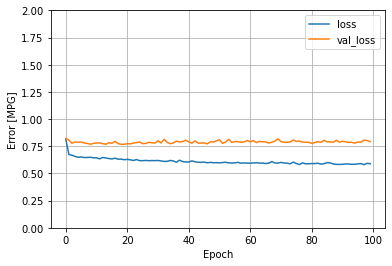

In [51]:
plot_loss(history)

In [52]:
train_pred = model.predict(X_Train)
test_pred = model.predict(X_Test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

pd.DataFrame({'Train': [train_mse], 'Test': [test_mse]}, index=['Mean Squared Error'])

,Train,Test
Mean Squared Error,0.629994,0.643286
